In [635]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score , roc_auc_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, f1_score , roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.preprocessing as preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from matplotlib import pyplot
import pandas as pd

_Random_Seed = 123

In [636]:
def changeIDs(df):
    for IDs in range(0,len(df['ID'])):
        df=df.replace(to_replace=df.iloc[IDs].at['ID'],value=IDs+1)
    return df

def replaceLabels(df,list1,list2):
    df[0]=df[0].replace([list1],list2)
    return df

def bestK(X_train,Y_train,cutoff):
    test = SelectKBest(score_func=chi2, k='all')
    fit = test.fit(X_train, Y_train)
    count=0
    for i in range(len(fit.scores_)):
        if (fit.scores_[i])>cutoff:
            count+=1
    return count,fit

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=10000000)

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(max_iter=10000000,probability=True,gamma='auto',kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=3)

In [637]:
#importing the train data
ADCTL_train_dataset = pd.read_csv('../data/ADCTLtrain.csv')
ADMCI_train_dataset = pd.read_csv('../data/ADMCItrain.csv')
MCICTL_train_dataset = pd.read_csv('../data/MCICTLtrain.csv')

ADCTL_train_dataset = ADCTL_train_dataset.replace(['CTL'],0)
ADCTL_train_dataset = ADCTL_train_dataset.replace(['AD'],1)

ADMCI_train_dataset = ADMCI_train_dataset.replace(['MCI'],0)
ADMCI_train_dataset = ADMCI_train_dataset.replace(['AD'],1)

MCICTL_train_dataset = MCICTL_train_dataset.replace(['MCI'],0)
MCICTL_train_dataset = MCICTL_train_dataset.replace(['CTL'],1)


ADCTL_train = ADCTL_train_dataset.drop('Label',axis=1)
ADCTL_train_Labels = ADCTL_train_dataset.Label

ADMCI_train = ADMCI_train_dataset.drop('Label',axis=1)
ADMCI_train_Labels = ADMCI_train_dataset.Label

MCICTL_train = MCICTL_train_dataset.drop('Label',axis=1)
MCICTL_train_Labels = MCICTL_train_dataset.Label

#importing the test data
ADCTL_test_dataset = pd.read_csv('../data/ADCTLtest.csv')
ADMCI_test_dataset = pd.read_csv('../data/ADMCItest.csv')
MCICTL_test_dataset = pd.read_csv('../data/MCICTLtest.csv')

In [638]:
##Encoding the Data
ADCTL_train.info()
ADMCI_train.info()
MCICTL_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Columns: 430 entries, ID to ZZEF1
dtypes: float64(429), object(1)
memory usage: 551.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 172 non-null    object 
 1   Background                         172 non-null    float64
 2   Left-Superior-Frontal-Gyrus        172 non-null    float64
 3   Right-Superior-Frontal-Gyrus       172 non-null    float64
 4   Left-Middle-Frontal-Gyrus          172 non-null    float64
 5   Right-Middle-Frontal-Gyrus         172 non-null    float64
 6   Left-Inferior-Frontal-Gyrus        172 non-null    float64
 7   Right-Inferior-Frontal-Gyrus       172 non-null    float64
 8   Left-Precentral-Gyrus              172 non-null    float64
 9   Right-Precentral-Gyrus  

In [639]:
ADCTL_train=changeIDs(ADCTL_train)
ADCTL_test=changeIDs(ADCTL_test_dataset)

ADMCI_train=changeIDs(ADMCI_train)
ADMCI_test=changeIDs(ADMCI_test_dataset)

MCICTL_train=changeIDs(MCICTL_train)
MCICTL_test=changeIDs(MCICTL_test_dataset)



In [640]:
ADCTL_test.tail()

,ID,Background,Precentral_L,Precentral_R,Frontal_Sup_2_L,Frontal_Sup_2_R,Frontal_Mid_2_L,Frontal_Mid_2_R,Frontal_Inf_Oper_L,Frontal_Inf_Oper_R,...,UQCRH,UQCRHL,UQCRQ,UTP6,VCAN,ZMAT2,ZNF281,ZNF467,ZNHIT3,ZZEF1
36,37,0.009388,0.304424,0.256985,0.343979,0.357574,0.406669,0.327130,0.364416,0.353773,...,10.502647,9.977012,9.900334,8.307940,10.820710,10.056814,8.134728,9.470969,9.311381,8.080754
37,38,0.010157,0.290400,0.279378,0.371042,0.380205,0.405114,0.307539,0.362570,0.351930,...,10.808553,10.062406,9.911297,8.200249,10.189987,10.524235,9.043638,9.957677,9.382803,7.543714
38,39,0.009287,0.305945,0.227899,0.350947,0.368172,0.446289,0.341376,0.346360,0.304098,...,10.710971,10.017026,10.130114,8.195351,10.397697,10.692857,8.983868,10.199715,9.185601,7.779877
39,40,0.009444,0.293440,0.250928,0.348354,0.330585,0.386043,0.289019,0.349709,0.348925,...,10.887797,10.103752,10.172839,7.851741,9.399775,10.815483,8.560456,9.313820,9.414897,7.221053
40,41,0.008576,0.234703,0.205477,0.323343,0.304403,0.324620,0.299059,0.324923,0.285127,...,11.321879,10.593531,10.452942,8.292398,9.651385,10.485043,8.603740,9.377628,9.884948,7.736542


In [641]:
ADCTL_train_Labels.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [642]:


def machine_model(train,labels,results):

    X_train, X_test, y_train, y_test = train_test_split(train,labels, test_size=0.20, random_state=_Random_Seed)

    accuracy, precision, f1, auc, mcc = {}, {}, {} , {}, {}
    classify = {}
    prob = {}
    text="{:.3%}"
    for key in models.keys():
        
        # Fit the classifier
        models[key].fit(X_train, y_train)
        
        # Make predictions
        predictions = models[key].predict(X_test)
        classify[key] = models[key].predict(results)
        prob[key] = models[key].predict_proba(results)
        # Calculate metrics
        accuracy[key] =text.format(accuracy_score(y_test,predictions))
        precision[key] = text.format(precision_score(y_test,predictions))
        f1[key] = text.format(f1_score(y_test,predictions))
        auc[key] = text.format(roc_auc_score(y_test,predictions))
        mcc[key] = text.format(matthews_corrcoef(y_test,predictions))
        
    import pandas as pd

    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision','F1','AUC','MCC'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['F1'] = f1.values()
    df_model['AUC'] = auc.values()
    df_model['MCC'] = mcc.values()
    
    return df_model,classify,prob

In [643]:
#Droping the IDs
ADCTL_train = ADCTL_train.drop('ID',axis=1)
ADCTL_test = ADCTL_test.drop('ID',axis=1)

#Normalazing and Scaler
scaler =MinMaxScaler().fit(ADCTL_train)

ADCTL_train = scaler.transform(ADCTL_train)
#ADCTL_train = preprocessing.normalize(ADCTL_train,norm='l2')

ADCTL_test = scaler.transform(ADCTL_test)
#ADCTL_test = preprocessing.normalize(ADCTL_test,norm='l2')

ADCTL_train.shape


(164, 429)

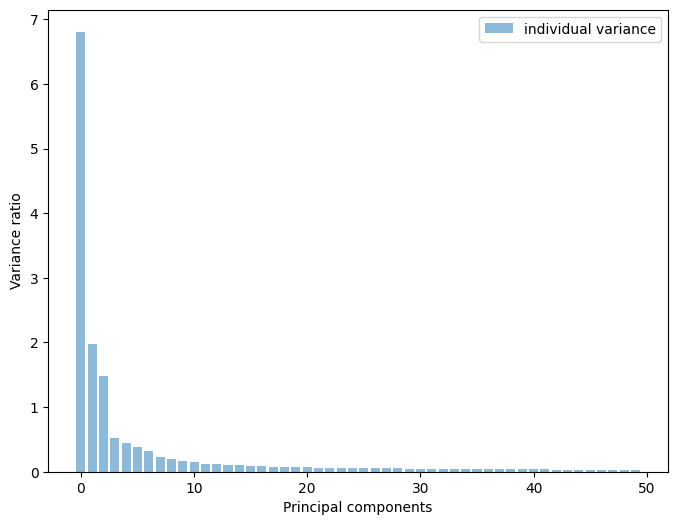

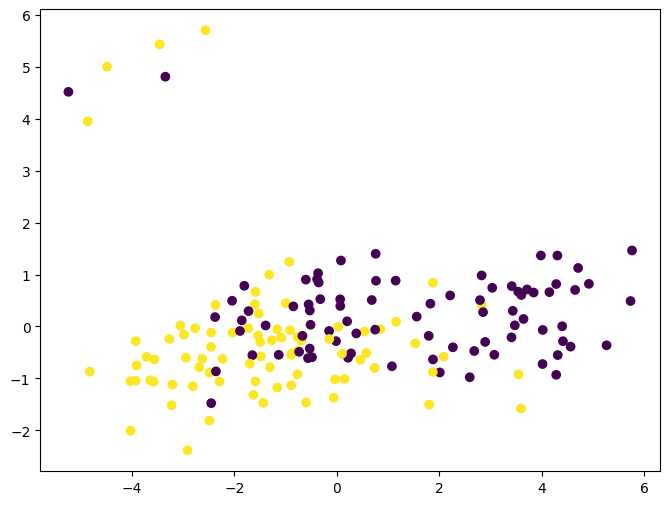

In [644]:
pca = PCA()
copy_ADCTL_train = ADCTL_train.copy()
copy_ADCTL_train_labels = ADCTL_train_Labels.copy()

pca.fit_transform(copy_ADCTL_train,copy_ADCTL_train_labels)
pca_variance = pca.explained_variance_

#print(len(pca_variance))

plt.figure(figsize=(8, 6))
plt.bar(range(50), pca_variance[0:50], alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

pca2 = PCA(n_components=6)
pca2.fit(copy_ADCTL_train)
x_3d = pca2.transform(copy_ADCTL_train)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,2],c=copy_ADCTL_train_labels)
plt.show()

In [645]:
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(ADCTL_train, ADCTL_train_Labels)

print(str(fit.get_feature_names_out()))

ADCTL_train = fit.transform(ADCTL_train)
ADCTL_test = fit.transform(ADCTL_test)


ADCTL_model,ADCTL_classify,ADCTL_prob= machine_model(ADCTL_train,ADCTL_train_Labels,ADCTL_test)

ADCTL_model


['x42' 'x223' 'x276' 'x308' 'x317' 'x358']


,Accuracy,Precision,F1,AUC,MCC
Logistic Regression,100.000%,100.000%,100.000%,100.000%,100.000%
Support Vector Machines,100.000%,100.000%,100.000%,100.000%,100.000%
Decision Trees,81.818%,85.714%,80.000%,81.618%,63.944%
Random Forest,90.909%,88.235%,90.909%,90.993%,81.985%
Naive Bayes,84.848%,78.947%,85.714%,85.110%,71.008%
K-Nearest Neighbor,93.939%,93.750%,93.750%,93.934%,87.868%


In [646]:
#Droping the IDs
#print(ADMCI_train.shape)
ADMCI_train =ADMCI_train.drop('ID',axis=1)
ADMCI_test =ADMCI_test.drop('ID',axis=1)
#Normalazing and Scaler
scaler = preprocessing.MaxAbsScaler().fit(ADMCI_train)

ADMCI_train = scaler.transform(ADMCI_train)
#ADMCI_train = preprocessing.quantile_transform(ADMCI_train,output_distribution='uniform')

ADMCI_test = scaler.transform(ADMCI_test)
#ADMCI_test = preprocessing.quantile_transform(ADMCI_test,output_distribution='uniform')

#for i in range(len(fs.scores_)):
   #print('Feature %d: %f' % (i, fs.scores_[i]))

#test = SelectKBest(score_func=chi2, k=number_k)
#fit = test.fit(ADMCI_train, ADMCI_train_Labels)


#ADMCI_train = fit.transform(ADMCI_train)
#ADMCI_test = fit.transform(ADMCI_test)


ADMCI_train.shape

(172, 63)

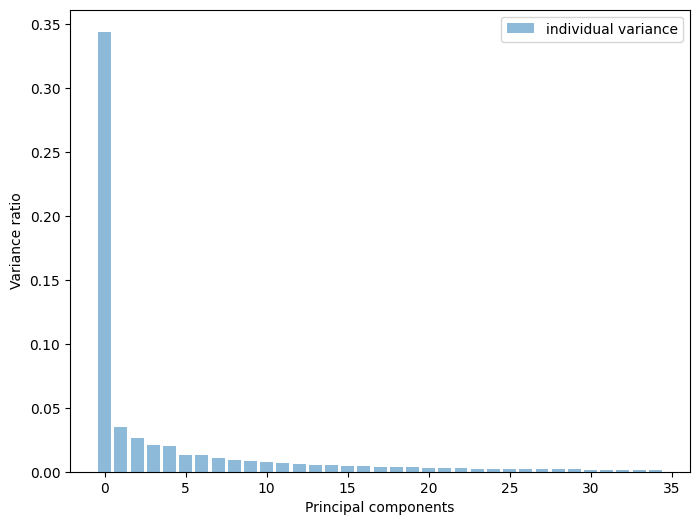

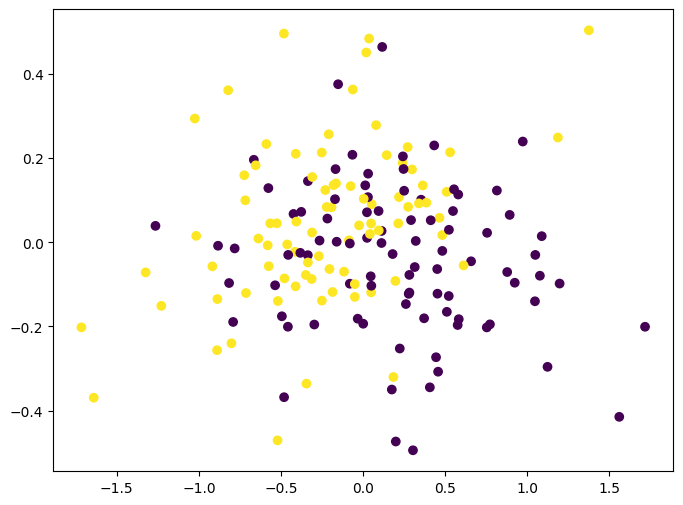

In [647]:
pca = PCA(random_state=_Random_Seed)
copy_train = ADMCI_train.copy()
copy_train_labels = ADMCI_train_Labels.copy()

pca.fit_transform(copy_train,copy_train_labels)
pca_variance = pca.explained_variance_

#print(len(pca_variance))

plt.figure(figsize=(8, 6))
plt.bar(range(35), pca_variance[0:35], alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

pca2 = PCA(n_components=12)
pca2.fit(copy_train)
x_3d = pca2.transform(copy_train)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1],c=copy_train_labels)
plt.show()

In [648]:
test = SelectKBest(score_func=chi2, k=12)
fit = test.fit(ADMCI_train, ADMCI_train_Labels)

print(str(fit.get_feature_names_out()))

ADMCI_train = fit.transform(ADMCI_train)
ADMCI_test = fit.transform(ADMCI_test)

['x21' 'x22' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x49' 'x50' 'x53' 'x54']


In [649]:
ADMCI_model,ADMCI_classify,ADMCI_prob = machine_model(ADMCI_train,ADMCI_train_Labels,ADMCI_test)

ADMCI_model

,Accuracy,Precision,F1,AUC,MCC
Logistic Regression,71.429%,72.222%,72.222%,71.405%,42.810%
Support Vector Machines,71.429%,68.182%,75.000%,71.078%,43.606%
Decision Trees,65.714%,68.750%,64.706%,65.850%,31.803%
Random Forest,80.000%,82.353%,80.000%,80.065%,60.131%
Naive Bayes,74.286%,71.429%,76.923%,74.020%,49.010%
K-Nearest Neighbor,62.857%,69.231%,58.065%,63.235%,27.380%


In [650]:
##ID droping
MCICTL_train=MCICTL_train.drop('ID',axis=1)
MCICTL_test=MCICTL_test.drop('ID',axis=1)

#K cut off selection

#Scaling and Normalazing
scaler = preprocessing.MinMaxScaler().fit(MCICTL_train)

MCICTL_train = scaler.transform(MCICTL_train)

MCICTL_test = scaler.transform(MCICTL_test)

MCICTL_train.shape


(172, 593)

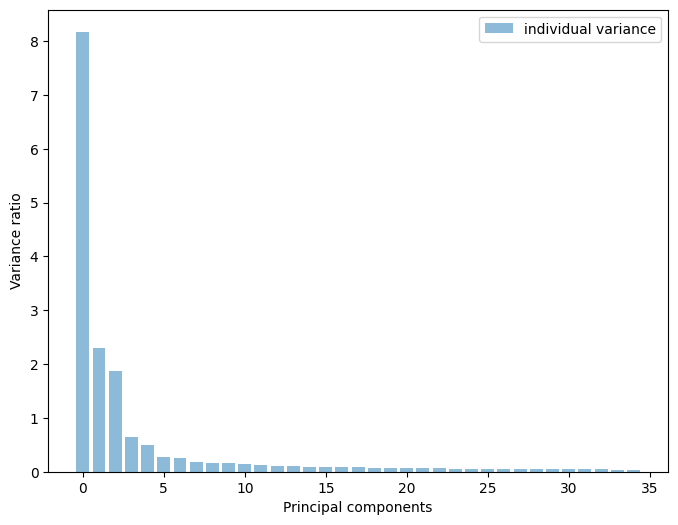

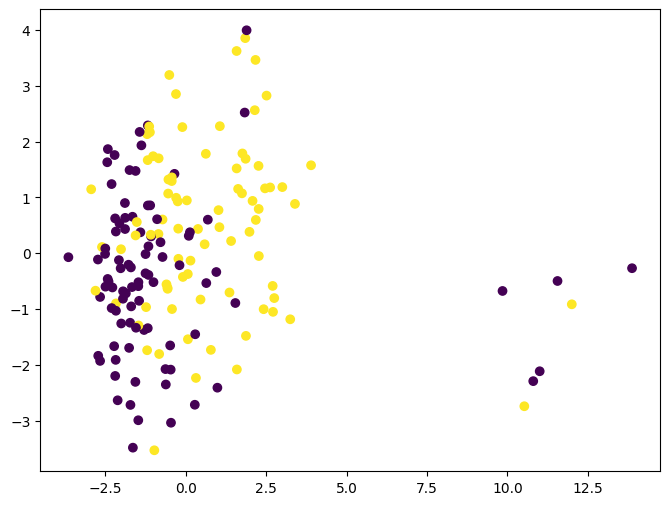

In [651]:
pca = PCA()
copy_train = MCICTL_train.copy()
copy_train_labels = MCICTL_train_Labels.copy()

pca.fit_transform(copy_train,copy_train_labels)
pca_variance = pca.explained_variance_

#print(len(pca_variance))

plt.figure(figsize=(8, 6))
plt.bar(range(35), pca_variance[0:35], alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

pca2 = PCA(n_components=4)
pca2.fit(copy_train)
x_3d = pca2.transform(copy_train)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1],c=copy_train_labels)
plt.show()

In [652]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(MCICTL_train, MCICTL_train_Labels)

print(str(fit.get_feature_names_out()))


MCICTL_train = fit.transform(MCICTL_train)
MCICTL_test = fit.transform(MCICTL_test)

['x335' 'x373' 'x456' 'x458']


In [653]:

MCICTL_model,MCICTL_classify,MCICTL_prob = machine_model(MCICTL_train,MCICTL_train_Labels,MCICTL_test)

MCICTL_model

,Accuracy,Precision,F1,AUC,MCC
Logistic Regression,91.429%,84.615%,88.000%,91.486%,81.508%
Support Vector Machines,82.857%,87.500%,70.000%,76.993%,61.025%
Decision Trees,65.714%,50.000%,53.846%,63.949%,27.031%
Random Forest,74.286%,60.000%,66.667%,74.457%,46.916%
Naive Bayes,82.857%,87.500%,70.000%,76.993%,61.025%
K-Nearest Neighbor,77.143%,66.667%,66.667%,74.638%,49.275%
